Day01_T_06.jpg successfully loaded
Day01_T_06.jpg : Segmentation Success
Day01_T_06.jpg : Detectection success

Number of Leaves in Day01_T_06.jpg : 4

Day02_T_06.jpg successfully loaded
Day02_T_06.jpg : Segmentation Success
Day02_T_06.jpg : Detectection success

Number of Leaves in Day02_T_06.jpg : 4

Day03_T_06.jpg successfully loaded
Day03_T_06.jpg : Segmentation Success
Day03_T_06.jpg : Detectection success

Number of Leaves in Day03_T_06.jpg : 5

Day04_T_06.jpg successfully loaded
Day04_T_06.jpg : Segmentation Success
Day04_T_06.jpg : Detectection success

Number of Leaves in Day04_T_06.jpg : 5

Day05_T_06.jpg successfully loaded
Day05_T_06.jpg : Segmentation Success
Day05_T_06.jpg : Detectection success

Number of Leaves in Day05_T_06.jpg : 5

Day06_T_06.jpg successfully loaded
Day06_T_06.jpg : Segmentation Success
Day06_T_06.jpg : Detectection success

Number of Leaves in Day06_T_06.jpg : 5

Day07_T_06.jpg successfully loaded
Day07_T_06.jpg : Segmentation Success
Day07_T_06.jpg 

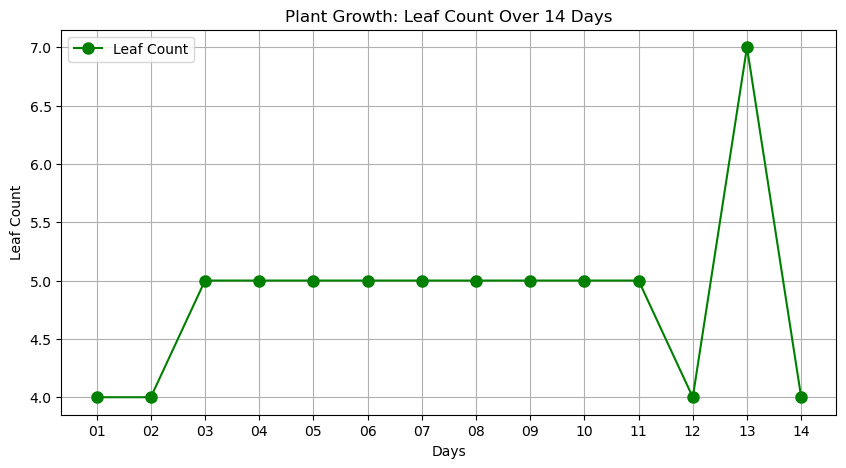

In [27]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

file_path = "images/input/"  # source
out_path = "images/output/"  # output

def image_enhance(image, output_path, filename):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #hsv to isolate green
    
    green_low = np.array([40, 40, 40]) #lower green boundary
    green_up = np.array([90, 255, 255]) #upper green boundary
    
    mask = cv2.inRange(hsv, green_low, green_up)#binary mask
    
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) #erosion->dialation (opening) noice remove
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) #dialation->erosion (closing) fill holes

    # Distance transform and thresholding for watershed
    dist_transform = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

    # Finding sure background area
    sure_bg = cv2.dilate(mask, kernel, iterations=3)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling for watershed
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1  # Ensure the background is not zero
    markers[unknown == 255] = 0  # Mark the unknown region

    # Apply Watershed
    image_copy = image.copy()
    cv2.watershed(image_copy, markers)
    image_copy[markers == -1] = [0, 0, 255]
    
    enhanced_path = output_path + "enhanced_images/"
    os.makedirs(enhanced_path, exist_ok=True)
    
    out_file = enhanced_path + filename
    cv2.imwrite(out_file, image_copy)
    if image_copy is not None:
        print(f"{filename} : Segmentation Success")
    else:
        print(f"{filename} : Unsuccessfull segementation")
    return sure_fg

def contour_draw(image, enhanced_image, output_path, filename):#finds and draws contours on the edge-detected image
    #find contours
    contours, _ = cv2.findContours(enhanced_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #show contours
    contour_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
    contour_path = output_path + "image_contours/"
    os.makedirs(contour_path, exist_ok=True)
    
    out_file = contour_path + filename
    cv2.imwrite(out_file, contour_image)
    if contour_image is None:
        print(f"{filename} : Error detecting leaves")
    else:
        print(f"{filename} : Detectection success")
    
    leaf_count = len(contours)
    print(f"\nNumber of Leaves in {filename} : {leaf_count}\n")
    
    return leaf_count

days = []
leaf_counts= []

for day in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14']:
    filename = f"Day{day}_T_06.jpg"
    file = file_path+filename

    image = cv2.imread(file)
    if image is None:
        print("Image not found:", file)
    else:
        print(f"{filename} successfully loaded")
        enhanced_image = image_enhance(image, out_path, filename)
        leaf_count = contour_draw(image, enhanced_image, out_path, filename) 
        
        days.append(day)
        leaf_counts.append(leaf_count)

plt.figure(figsize=(10, 5))
plt.plot(days, leaf_counts, marker='o', linestyle='-', color='g', markersize=8, label="Leaf Count")
plt.xlabel("Days")
plt.ylabel("Leaf Count")
plt.title("Plant Growth: Leaf Count Over 14 Days")
plt.xticks(days)  
plt.legend()
plt.grid(True)
plt.show()
        